# BigQuery - Sample - Genomics

This notebook demonstrates working with sample gene data stored as publicly accessible BigQuery datasets.

### In this notebook you will

* Explore genomics datasets available in BigQuery
  * Personal Genome Project
  * 1000 Genomes
* Use the `%%sql` statement to write and execute SQL statements within the notebook
* Extract data from BigQuery and create a local dataset that can be manipulated in Python
* Refine and pivot your local dataset via the Pandas Python library
* Visualize different aspects of your dataset via the Matplotlib Python library


### Attribution
This notebook is based on the [Google Genomics](https://cloud.google.com/genomics/) BigQuery examples here:
* [Personal Genome Project](https://github.com/googlegenomics/bigquery-examples/tree/master/pgp)
* [1000 Genomes](https://github.com/googlegenomics/bigquery-examples/tree/master/1000genomes/data-stories/exploring-the-phenotypic-data)

----

In [1]:
import gcp.bigquery as bq

# Exploring the Personal Genome Project dataset

First let's look at the table of phenotypes that we want to explore here. We can use the `gcp.bigquery` Python package to fetch the table schema. We can see a number of fields that provide details for a given participant's genome, such as the existence of certain diseases/conditions (e.g., has_Asthma) as well as the participant's heritage (e.g., Maternal_grandfather_Country_of_origin). 

In [2]:
phenotypes = bq.Table('google.com:biggene:pgp.phenotypes')
phenotypes.schema

[{ 'name': 'Participant', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Year_of_birth', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Which_statement_best_describes_you', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Severe_disease_or_rare_genetic_trait', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Disease_trait_Onset', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Disease_trait_Rarity', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Disease_trait_Severity', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Disease_trait_Relative_enrollment', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Disease_trait_Diagnosis', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Disease_trait_Genetic_confirmation', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Disease_trait_Documentation', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Sex_Gender', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Race_ethnicity', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Maternal_grandmother_Country_of_origin', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Paternal_grandmother_Country_of_origin', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Paternal_grandfather_Country_of_origin', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Maternal_grandfather_Country_of_origin', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Enrollment_of_relatives', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Enrollment_of_older_individuals', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Enrollment_of_parents', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Enrolled_relatives_Monozygotic_Identical_twins', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Enrolled_relatives_Parents', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Enrolled_relatives_Siblings_Fraternal_twins', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Enrolled_relatives_Children', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Enrolled_relatives_Grandparents', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Enrolled_relatives_Grandchildren', 'type': 'BOOLEAN', 'mode':'None', 'description': 'None' },
 { 'name': 'Enrolled_relatives_Aunts_Uncles', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Enrolled_relatives_Nephews_Nieces', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Enrolled_relatives_Half_siblings', 'type': 'BOOLEAN', 'mode':'None', 'description': 'None' },
 { 'name': 'Enrolled_relatives_Cousins_or_more_distant', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Enrolled_relatives_Not_genetically_related_e_g_husband_wife', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Are_all_your_enrolled_relatives_linked_to_your_PGP_profile', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Have_you_uploaded_genetic_data_to_your_PGP_participant_profile', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Have_you_used_the_PGP_web_interface_to_record_a_designated_proxy', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Have_you_uploaded_health_record_data_using_our_Google_Health_or_Microsoft_Healthvault_interfaces', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Uploaded_health_records_Update_status', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Uploaded_health_records_Extensiveness', 'type': 'INTEGER', 'mode':'None', 'description': 'None' },
 { 'name': 'Blood

Let's look at a few rows from the table for a few phenotype attributes of interest.

In [3]:
phenotypes.sample(fields=['Participant',
                          'Sex_Gender',
                          'Year_of_birth',
                          'Maternal_grandmother_Country_of_origin',
                          'Maternal_grandfather_Country_of_origin'])

job_XD0Z8OUJwGDsVd877VrNLSeu3L0 (1.5s, 123KB processed) rows: 5

## Querying

Let's dig further into the phenotypes table and get some statistics on the occurrence of asthma among the participants present within the dataset. The `%%sql` statement allows us to write SQL within our notebook and execute it within BigQuery.

In [4]:
%%sql --module asthma
SELECT Participant,
       IFNULL(Sex_Gender, 'Unknown') AS gender,
       IF(has_Asthma IS NULL, 0, 1) AS has_asthma
FROM $phenotypes

Our SQL is now stored in a module called `asthma`. We can create a BigQuery query and execute it by calling `bq.Query(asthma).results()` (we will have to supply a phenotypes argument).  Additionally, let's convert the results to a [Pandas dataframe](http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.html) and display just the first 5 rows from the results.

In [5]:
bq.Query(asthma, phenotypes=phenotypes).results().to_dataframe()[:5]

,Participant,gender,has_asthma
0,huBFBBD8,Male,0
1,hu5880D9,Female,0
2,hu9367D1,Male,0
3,hu57850F,Female,0
4,hu1069B0,Female,0


### Composing Queries

Now that we've seen the structure of the rows generated by our `$asthma` query, let's summarize the results by computing the percentage of the overall dataset having asthma. We can accomplish this by nesting our previous query within an outer `SELECT` statement. The `%%sql` statement allows us to embed our previous `$asthma` query like so:

In [6]:
%%sql
SELECT ROUND(AVG(has_asthma) * 100, 2) AS percent_has_asthma FROM $asthma

job_kgg_mQqkApcwxv43IuhtGizUFzY (1.4s, 199B processed) rows: 1

Notice the reference to the previous query we defined via the `$asthma` placeholder. In this case, because we were executing the query immediately in the notebook (because we did not specify a module name with --name), we did not need to explicitly define the phenotype argument; %%sql will take care of that replacement. The resulting query is a nested SQL statement.

This is handy because we can build up our large, complex query one piece at a time and validate that the intermediate results we're getting along the way.

Let's further refine our `$asthma` query and compute the average occurrence broken down by gender this time.

In [7]:
%%sql
SELECT gender,
       ROUND(AVG(has_asthma) * 100, 2) AS percent_has_asthma
FROM $asthma
GROUP BY gender

job_5EvIt1MgumqJkrCHxYF_3kCns28 (2.0s, 14KB processed) rows: 4

Looks like there are roughly twice as many female (versus male) genomes with the asthma phenotype in this dataset.

### Python Pandas Integration

Since our `$asthma` query returns a result set that is small enough to easily fit into memory (at ~2k rows), let's create a local dataset from our query by populating a [Pandas dataframe](http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.html) object and saving it to the `df` variable.

In [8]:
df = bq.Query(asthma, phenotypes=phenotypes).to_dataframe()

Notice we did not need to call results() before calling to_dataframe(); results() returns a Table object but both Table and Query have to_dataframe() methods, so we can simplify here. This dataframe allows us to slice and dice our data in a number of ways and all of the computation will happen locally. Let's try getting the number of genomes per gender via our dataframe.

In [9]:
df.groupby('gender').sum()

,has_asthma
gender,
Female,103
Male,85
Transmasculine,0
Unknown,11


So that shows us the total number of participants annotated to have asthma, broken down by gender. Let's see if we can reproduce the percent_has_asthma column that we computed above via BigQuery.

In [10]:
df.groupby('gender').mean() * 100

,has_asthma
gender,
Female,12.032710
Male,6.800000
Transmasculine,0.000000
Unknown,13.924051


Great! So for datasets that easily fit into memory, we can easily aggregate our results via the Pandas dataframe using an approach very similar to our SQL statement.

## Visualization

Every Pandas dataframe can be used for visualization by calling the [`dataframe.plot()`](http://pandas.pydata.org/pandas-docs/dev/visualization.html) method.  Let's plot the counts of asthma occurrence broken down by gender.

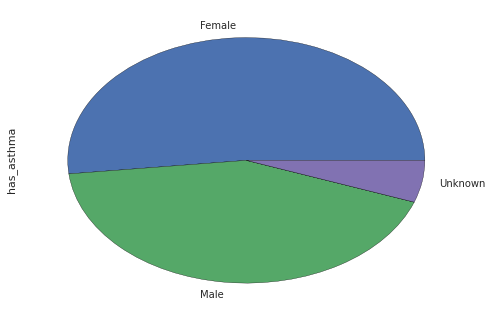

In [11]:
tally = df.groupby('gender').sum()
tally.plot(kind='pie', y='has_asthma', legend=False)

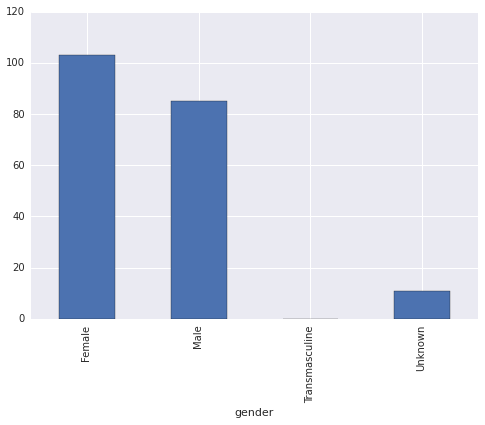

In [12]:
tally.plot(kind='bar', y='has_asthma', legend=False)

# Exploring the 1000 Genomes datasets

Now let's look at a different genome dataset provided by the [1000 Genomes project](http://www.1000genomes.org/).  We'll start by taking a look at the gender ratio for participants in the genome dataset.

In [13]:
%%sql --module genders
SELECT gender,
        gender_count,
        RATIO_TO_REPORT(gender_count)
OVER (ORDER BY gender_count) AS gender_ratio
FROM (
  SELECT gender,
          COUNT(gender) AS gender_count,
  FROM [genomics-public-data:1000_genomes.sample_info]
  GROUP BY gender)

In [14]:
genders_df = bq.Query(genders).to_dataframe()
genders_df

,gender,gender_count,gender_ratio
0,male,1740,0.497143
1,female,1760,0.502857


So we see the gender break down is roughly equal within the dataset.

## Composing queries

Now let's see how our genomes are distributed across different world populations and super population groups.

In [15]:
%%sql --module pops
SELECT
  population,
  population_description,
  super_population,
  super_population_description,
  COUNT(population) AS population_count,
FROM
  [genomics-public-data:1000_genomes.sample_info]
GROUP BY
  population,
  population_description,
  super_population,
  super_population_description

In [16]:
bq.Query(pops).results()

job_lnWwO6fCp9XuxLlIaBa-CGhHhyU (3.0s, 178KB processed) rows: 26

Continuing further, let's calculate the fraction of each population's contribution to the whole using the [`RATIO_TO_REPORT`](https://cloud.google.com/bigquery/query-reference#windowfunctions) BigQuery analytic function, which gives us the fractional contribution of each population to the total dataset. We can compose this query by referencing our previous `$pops` query like so:

In [17]:
%%sql --module pops_ratio
SELECT
  population,
  population_description,
  population_count,
  RATIO_TO_REPORT(population_count)
    OVER (ORDER BY population_count) AS population_ratio,
  super_population,
  super_population_description,
FROM ($pops)

In [18]:
pops_df = bq.Query(pops_ratio, pops=pops).to_dataframe()
pops_df

,population,population_description,population_count,population_ratio,super_population,super_population_description
0,FIN,Finnish in Finland,105,0.030000,EUR,European
1,JPT,"Japanese in Tokyo, Japan",105,0.030000,EAS,East Asian
2,GBR,British in England and Scotland,107,0.030571,EUR,European
3,MXL,"Mexican Ancestry in Los Angeles, California",107,0.030571,AMR,American
4,CHB,"Han Chinese in Bejing, China",108,0.030857,EAS,East Asian
5,CDX,"Chinese Dai in Xishuangbanna, China",109,0.031143,EAS,East Asian
6,TSI,Toscani in Italy,112,0.032000,EUR,European
7,ASW,African Ancestry in Southwest US,112,0.032000,AFR,African
8,GIH,"Gujarati Indian in Houston,TX",113,0.032286,SAS,South Asian
9,LWK,"Luhya in Webuye, Kenya",116,0.033143,AFR,African


## Visualization

Let's visualize the number of genomes available per population group as a bar chart.  We can simply use our Pandas dataframe to plot the dimensions of interest.

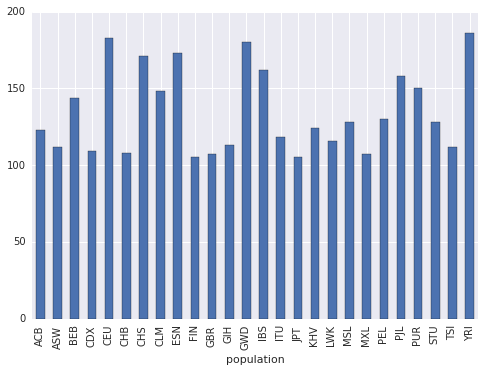

In [19]:
pops_df.groupby('population').sum().plot(kind='bar', y='population_count', legend=False)

What are the ratios of ethnicities grouped by super population? We can find out by aggregating our local dataset via the Pandas dataframe.

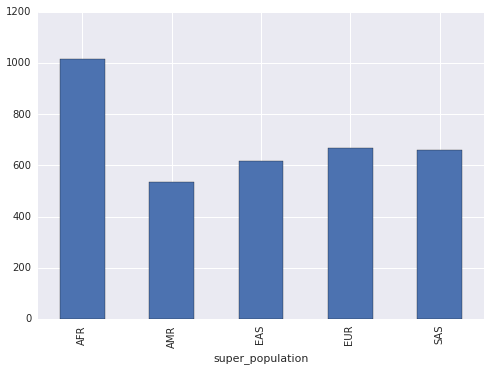

In [20]:
pops_df.groupby('super_population').sum().plot(kind='bar', y='population_count', legend=False)

Some of the dataset participants happen to be relatives. Let's see how the family size is distributed among the genomes available:

In [21]:
%%sql --module family_sizes
SELECT
  num_family_members AS family_size,
  COUNT(num_family_members) AS num_families_of_size
FROM (
  SELECT
    family_id,
    COUNT(family_id) AS num_family_members,
  FROM [genomics-public-data:1000_genomes.sample_info]
  GROUP BY family_id)
GROUP BY family_size

In [22]:
family_sizes_df = bq.Query(family_sizes).to_dataframe()
family_sizes_df

,family_size,num_families_of_size
0,1,1185
1,2,191
2,3,593
3,4,1
4,5,6
5,6,20


So we see that while the majority of participants do not have any relatives within the dataset, there are ~200 two-person families present and many fewer 3-person and larger families. 

We can plot the family size distribution using the dataframe again.

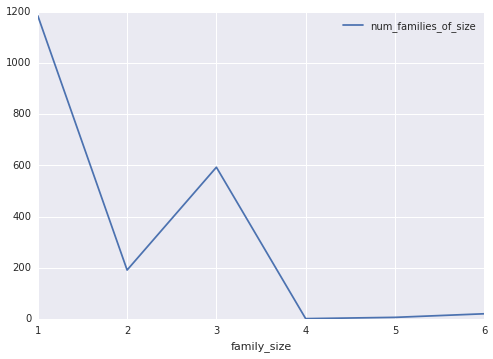

In [23]:
family_sizes_df.plot(x='family_size')